<a href="https://colab.research.google.com/gist/himanshu-03/4583d2f2dffe645eb5db5c670fd032be/netfix-movie-recommendation-system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Netfix Movie Recommendation System**

Assume that you started working with Netfix as a Junior Data Scientist. For your company,
providing better movie recommendations is at its core and, helps improve better user
experience and generate more revenue.

Understand that:
- Recommender systems make movie-watching a personalized adventure, delighting
users with tailored suggestions based on their tastes.


- By predicting user preferences, these systems keep users engaged, driving increased
interaction with your platform.


- A robust movie recommender system translates to business success. Satis ed users
are loyal users, contributing to increased user retention and revenue.

In [ ]:
import pandas as pd

### **Shape of `movies.csv`**

In [ ]:
movies = pd.read_csv('movies.csv')
movies.shape

(9742, 3)

### **Shape of `ratings.csv`**

In [ ]:
ratings = pd.read_csv('ratings.csv')
ratings.shape

(100836, 4)

### **Unique "userId" in `ratings.csv`**

In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [ ]:
ratings['userId'].nunique()

610

### **Movie with  maximum number of ratings**

In [ ]:
movie_id = ratings.groupby('movieId')['rating'].count().nlargest(1).index[0]
movies[movies['movieId'] == movie_id]

,movieId,title,genres
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War


### **Identifying tags submitted by users to "Matrix, The (1999)" movie**

In [ ]:
movie_id = movies[movies['title'] == 'Matrix, The (1999)']['movieId'].values[0]
tags = pd.read_csv('tags.csv')
tags[tags['movieId'] == movie_id]

,userId,movieId,tag,timestamp
815,424,2571,martial arts,1457842912
816,424,2571,sci-fi,1457842899
1646,474,2571,alternate universe,1137204991
2794,537,2571,philosophy,1424141098
2795,537,2571,post apocalyptic,1424141101


### **Average user rating for movie named "Terminator 2:Judgment Day (1991)**

In [ ]:
movie_id = movies[movies['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]
ratings[ratings['movieId'] == movie_id]['rating'].mean()

3.970982142857143

### **Data Distribution of user ratings for "Fight Club (1999)" movie**

<Axes: ylabel='Frequency'>

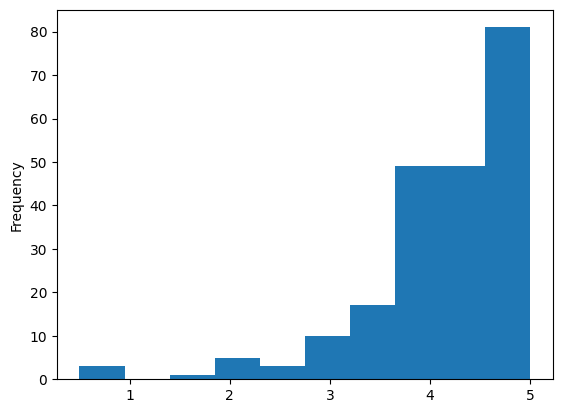

In [ ]:
movie_id = movies[movies['title'] == 'Fight Club (1999)']['movieId'].values[0]
ratings[ratings['movieId'] == movie_id]['rating'].plot.hist()

# **Performing the desired operations**

#### 1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings.

In [ ]:
grouped_ratings = ratings.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
grouped_ratings.head()

movieId rating          
           count      mean
0       1    215  3.920930
1       2    110  3.431818
2       3     52  3.259615
3       4      7  2.357143
4       5     49  3.071429

Renaming the columns of `grouped_ratings` for better understanding

In [ ]:
grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']
grouped_ratings.head()

,movieId,rating_count,rating_mean
0,1,215,3.920930
1,2,110,3.431818
2,3,52,3.259615
3,4,7,2.357143
4,5,49,3.071429


#### 2. Applying inner join on dataframe created from `movies.csv` and the `grouped_ratings` from step 1.

In [ ]:
grouped_movies = pd.merge(movies, grouped_ratings, on='movieId', how='inner')
grouped_movies.head()

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429


#### 3. Filtering only those movies which have more than 50 user ratings (i.e. > 50).

In [ ]:
filtered_movies = grouped_movies[grouped_movies['rating_count'] > 50]
filtered_movies.head()

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


### **Movie most popular based on average user ratings**  *(After performing operations)*

In [ ]:
filtered_movies.loc[filtered_movies['rating_mean'].idxmax()]

movieId                                      318
title           Shawshank Redemption, The (1994)
genres                               Crime|Drama
rating_count                                 317
rating_mean                             4.429022
Name: 277, dtype: object

### **Top 5 popular movies based on number of user ratings**

In [ ]:
filtered_movies.sort_values('rating_count', ascending=False).head()

,movieId,title,genres,rating_count,rating_mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


### **Third most popular Sci-Fi movie based on number of user ratings**

In [ ]:
filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi')].sort_values('rating_count', ascending=False)[2:3]

,movieId,title,genres,rating_count,rating_mean
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.75


In [ ]:
filtered_movies

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


## **Web Scraping**

**We already have a subset `filtered_movies` of data containing only those movies which has recieved more than 50 user ratings.**

**Using "links.csv", we will scrape the IMDB reviews of each movie with more than 50 user ratings.**

In [ ]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8',
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'class' : 'sc-bde20123-1 cMEQkK'})
    return imdb_rating.text if imdb_rating else np.nan

### **Applying inner join on `links` and `filtered_movies`to get the `imdbId` and `tmbdId` based on `movieId`**

In [ ]:
links = pd.read_csv('links.csv')
imdb_movies = pd.merge(filtered_movies, links, on='movieId', how='inner')
imdb_movies

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0
...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0


### **Scraping the IMDb ratings from the website using the scrapper function above for all movies in `imdb_movies`**

In [ ]:
imdb_ratings = []
for i in range(len(imdb_movies)):
    imdbId = imdb_movies.iloc[i]['imdbId']
    imdb_rating = scrapper(imdbId)
    imdb_ratings.append(imdb_rating)
imdb_movies['imdb_rating'] = imdb_ratings
imdb_movies
imdb_movies.to_csv('imdb_movies.csv', index=False)

**Here we get the imdb ratings of all the movies in the `imdb_movies` dataframe**

In [ ]:
imdb_movies

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId,imdb_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0,8.3
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0,7.1
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0,6.6
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0,8.3
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0,6.3
...,...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0,8.2
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0,8.1
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0,8.7
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0,8.0


### **movieId of the movie which has the highest IMDB rating**

In [ ]:
imdb_movies.sort_values('imdb_rating', ascending=False).head(1)['movieId']

53    318
Name: movieId, dtype: int64

### **movieId of the "Sci-Fi" movie which has the highest IMDB rating.**

In [ ]:
imdb_movies[imdb_movies['genres'].str.contains('Sci-Fi')].sort_values('imdb_rating', ascending=False).head(1)['movieId']

424    79132
Name: movieId, dtype: int64